# EDA-Project 1

Это ваш первый проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"foreign_exchange_rates.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с подде, визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
rates = pd.read_csv('foreign_exchange_rates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)
rates.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
rates.describe()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
count,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217,...,5217,5217,5217,5217,5217,5217,5217,5217,5217,5217
unique,5217,2959,2704,2681,2303,3880,3147,2711,893,1998,...,2927,4462,2848,1788,4511,4574,1781,3190,714,1380
top,2005-02-28,ND,ND,ND,ND,ND,ND,8.2765,ND,ND,...,ND,ND,ND,3.8,ND,ND,ND,ND,ND,ND
freq,1,198,198,198,198,198,198,208,198,199,...,198,198,198,1376,198,198,198,198,201,198


In [10]:
# Для анализа возьмем британский фунт
currencies = rates.columns.tolist()
UK = 'UNITED KINGDOM - UNITED KINGDOM POUND/US$'
pound = rates[['Time Serie',UK]]
pound = pound[pound[UK] != 'ND']
print(pound.head())
print(pound.tail())
pound[UK] = pound[UK].astype(float)

   Time Serie UNITED KINGDOM - UNITED KINGDOM POUND/US$
0  2000-01-03                                    0.6146
1  2000-01-04                                    0.6109
2  2000-01-05                                    0.6092
3  2000-01-06                                     0.607
4  2000-01-07                                    0.6104
      Time Serie UNITED KINGDOM - UNITED KINGDOM POUND/US$
5211  2019-12-24                                    0.7719
5213  2019-12-26                                    0.7688
5214  2019-12-27                                    0.7639
5215  2019-12-30                                     0.761
5216  2019-12-31                                    0.7536


In [54]:
currencies = currencies[1:]

In [9]:
pound.describe()

,UNITED KINGDOM - UNITED KINGDOM POUND/US$
count,5019.000000
mean,0.640372
std,0.082611
min,0.473800
25%,0.587400
50%,0.636400
75%,0.692350
max,0.828700


In [14]:
pound['year'] = pound['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
pound['month'] = pound['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
pound['day'] = pound['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)
pound['weekday'] = pound['Time Serie'].apply(lambda x: datetime.strftime(datetime.strptime(x, '%Y-%m-%d'),'%A'))

In [15]:
pound.head()

,Time Serie,UNITED KINGDOM - UNITED KINGDOM POUND/US$,year,month,day,weekday
0,2000-01-03,0.6146,2000,1,3,Monday
1,2000-01-04,0.6109,2000,1,4,Tuesday
2,2000-01-05,0.6092,2000,1,5,Wednesday
3,2000-01-06,0.6070,2000,1,6,Thursday
4,2000-01-07,0.6104,2000,1,7,Friday


   Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$  year
0  2000-01-03                             1.5172  2000
1  2000-01-04                             1.5239  2000
2  2000-01-05                             1.5267  2000
3  2000-01-06                             1.5291  2000
4  2000-01-07                             1.5272  2000
      Time Serie  AUSTRALIA - AUSTRALIAN DOLLAR/US$  year
5211  2019-12-24                             1.4445  2019
5213  2019-12-26                             1.4411  2019
5214  2019-12-27                             1.4331  2019
5215  2019-12-30                             1.4278  2019
5216  2019-12-31                             1.4225  2019


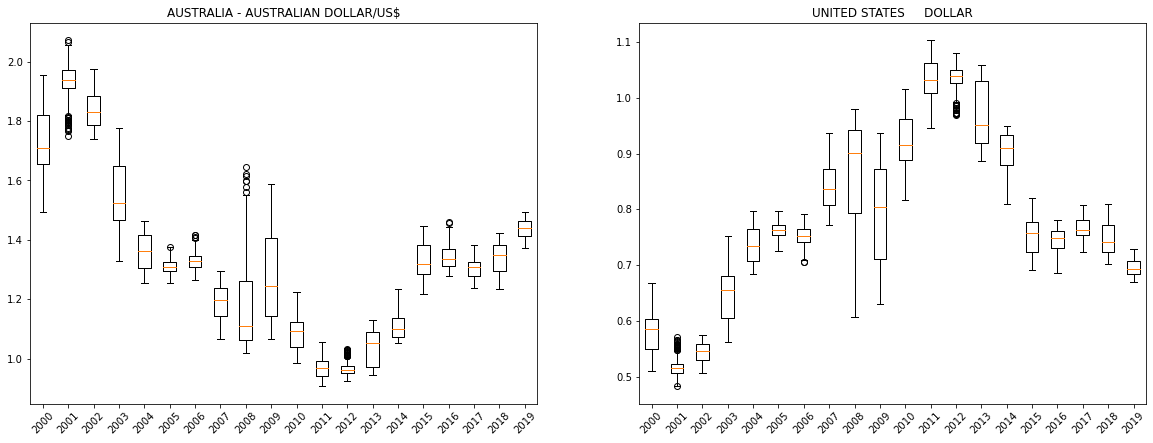

   Time Serie  EURO AREA - EURO/US$  year
0  2000-01-03                0.9847  2000
1  2000-01-04                0.9700  2000
2  2000-01-05                0.9676  2000
3  2000-01-06                0.9686  2000
4  2000-01-07                0.9714  2000
      Time Serie  EURO AREA - EURO/US$  year
5211  2019-12-24                0.9022  2019
5213  2019-12-26                0.9007  2019
5214  2019-12-27                0.8949  2019
5215  2019-12-30                0.8915  2019
5216  2019-12-31                0.8907  2019


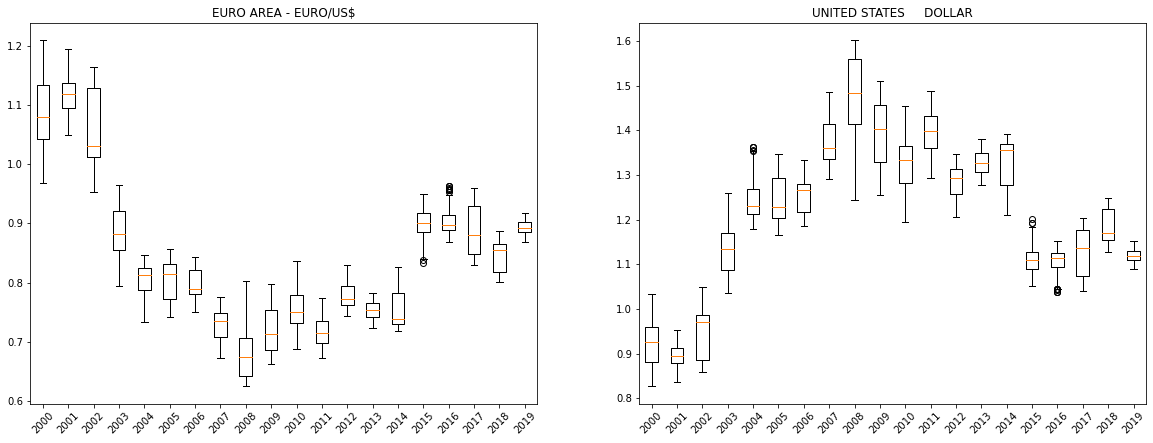

   Time Serie  NEW ZEALAND - NEW ZELAND DOLLAR/US$  year
0  2000-01-03                               1.9033  2000
1  2000-01-04                               1.9238  2000
2  2000-01-05                               1.9339  2000
3  2000-01-06                               1.9436  2000
4  2000-01-07                               1.9380  2000
      Time Serie  NEW ZEALAND - NEW ZELAND DOLLAR/US$  year
5211  2019-12-24                               1.5058  2019
5213  2019-12-26                               1.5002  2019
5214  2019-12-27                               1.4919  2019
5215  2019-12-30                               1.4846  2019
5216  2019-12-31                               1.4826  2019


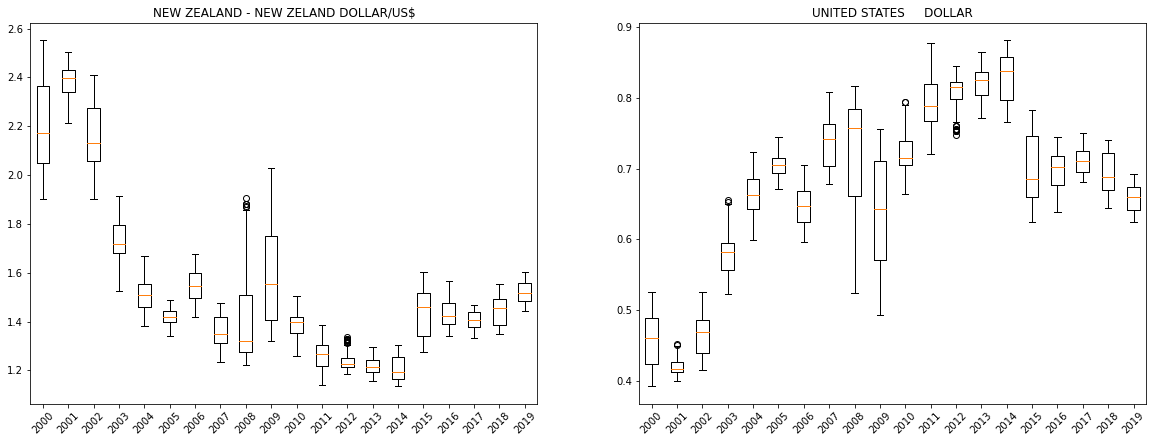

   Time Serie  UNITED KINGDOM - UNITED KINGDOM POUND/US$  year
0  2000-01-03                                     0.6146  2000
1  2000-01-04                                     0.6109  2000
2  2000-01-05                                     0.6092  2000
3  2000-01-06                                     0.6070  2000
4  2000-01-07                                     0.6104  2000
      Time Serie  UNITED KINGDOM - UNITED KINGDOM POUND/US$  year
5211  2019-12-24                                     0.7719  2019
5213  2019-12-26                                     0.7688  2019
5214  2019-12-27                                     0.7639  2019
5215  2019-12-30                                     0.7610  2019
5216  2019-12-31                                     0.7536  2019


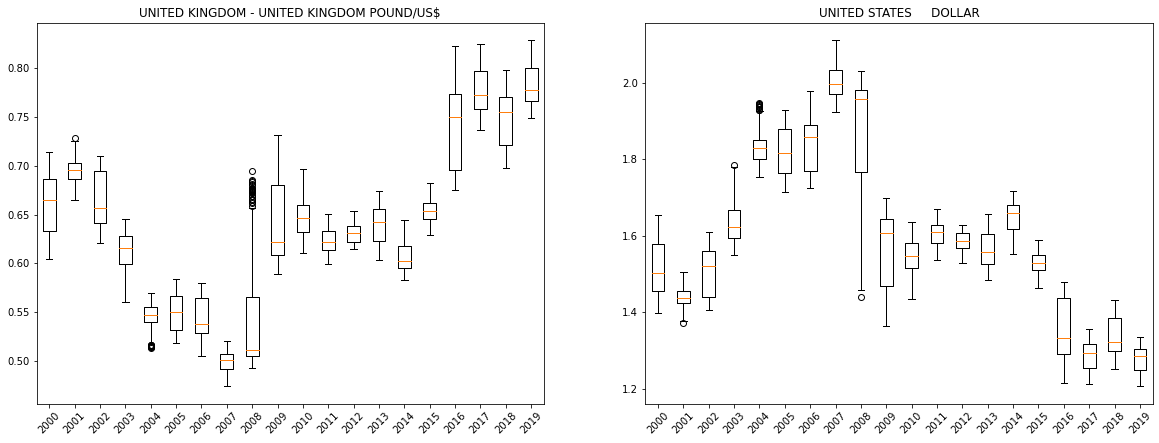

   Time Serie  BRAZIL - REAL/US$  year
0  2000-01-03             1.8050  2000
1  2000-01-04             1.8405  2000
2  2000-01-05             1.8560  2000
3  2000-01-06             1.8400  2000
4  2000-01-07             1.8310  2000
      Time Serie  BRAZIL - REAL/US$  year
5211  2019-12-24             4.0833  2019
5213  2019-12-26             4.0602  2019
5214  2019-12-27             4.0507  2019
5215  2019-12-30             4.0152  2019
5216  2019-12-31             4.0190  2019


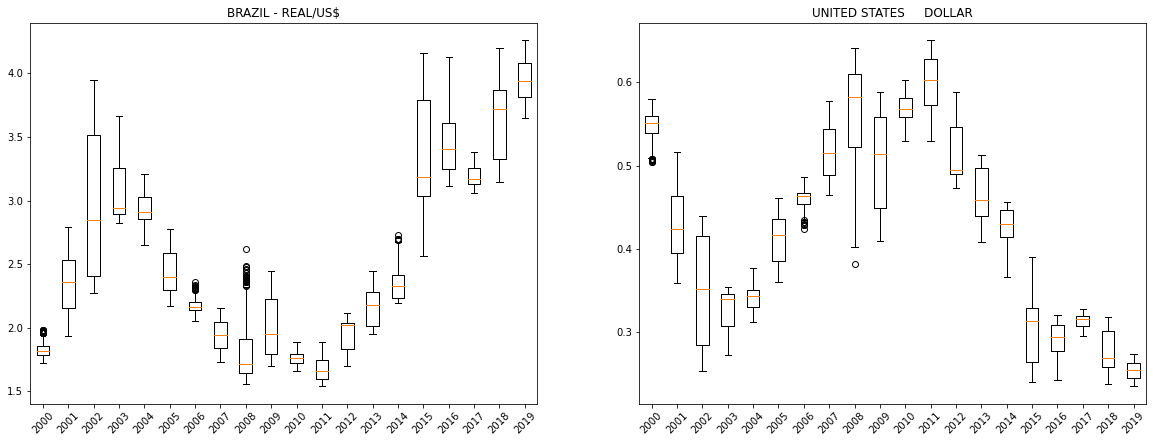

   Time Serie  CANADA - CANADIAN DOLLAR/US$  year
0  2000-01-03                        1.4465  2000
1  2000-01-04                        1.4518  2000
2  2000-01-05                        1.4518  2000
3  2000-01-06                        1.4571  2000
4  2000-01-07                        1.4505  2000
      Time Serie  CANADA - CANADIAN DOLLAR/US$  year
5211  2019-12-24                        1.3160  2019
5213  2019-12-26                        1.3124  2019
5214  2019-12-27                        1.3073  2019
5215  2019-12-30                        1.3058  2019
5216  2019-12-31                        1.2962  2019


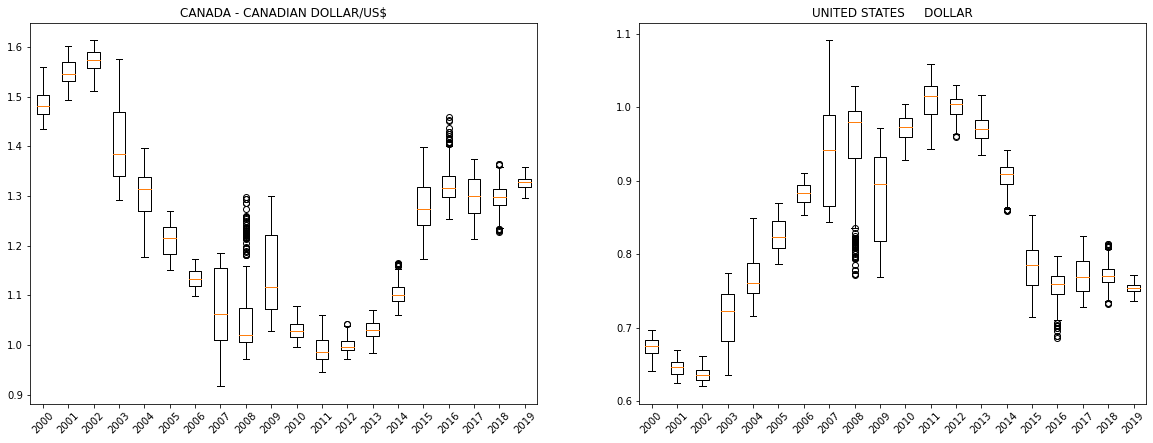

   Time Serie  CHINA - YUAN/US$  year
0  2000-01-03            8.2798  2000
1  2000-01-04            8.2799  2000
2  2000-01-05            8.2798  2000
3  2000-01-06            8.2797  2000
4  2000-01-07            8.2794  2000
      Time Serie  CHINA - YUAN/US$  year
5211  2019-12-24            7.0064  2019
5213  2019-12-26            6.9949  2019
5214  2019-12-27            6.9954  2019
5215  2019-12-30            6.9864  2019
5216  2019-12-31            6.9618  2019


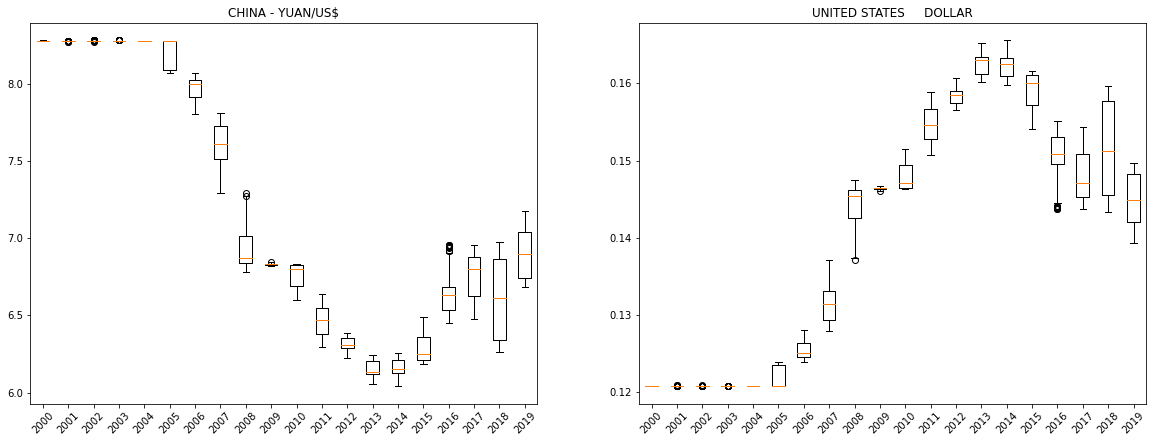

   Time Serie  HONG KONG - HONG KONG DOLLAR/US$  year
0  2000-01-03                            7.7765  2000
1  2000-01-04                            7.7775  2000
2  2000-01-05                            7.7780  2000
3  2000-01-06                            7.7785  2000
4  2000-01-07                            7.7783  2000
      Time Serie  HONG KONG - HONG KONG DOLLAR/US$  year
5211  2019-12-24                            7.7872  2019
5213  2019-12-26                            7.7880  2019
5214  2019-12-27                            7.7874  2019
5215  2019-12-30                            7.7857  2019
5216  2019-12-31                            7.7894  2019


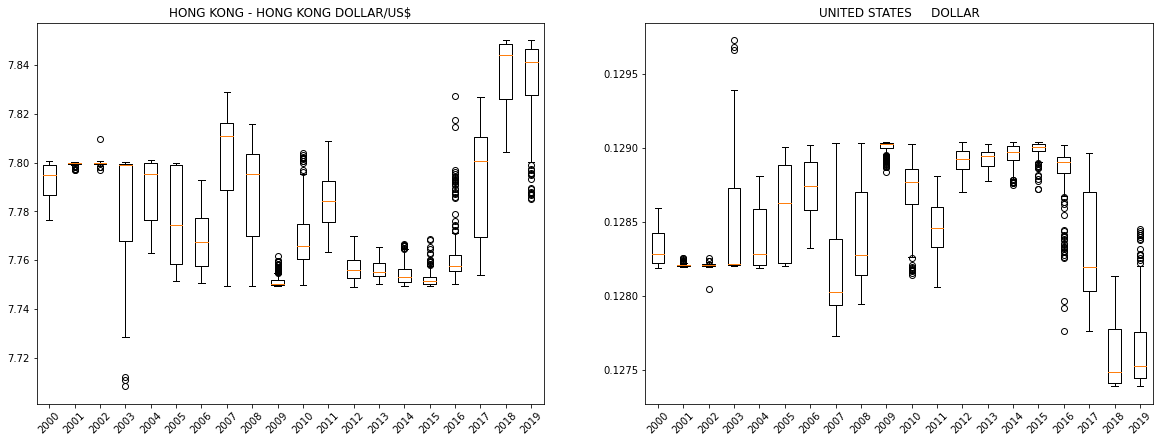

   Time Serie  INDIA - INDIAN RUPEE/US$  year
0  2000-01-03                     43.55  2000
1  2000-01-04                     43.55  2000
2  2000-01-05                     43.55  2000
3  2000-01-06                     43.55  2000
4  2000-01-07                     43.55  2000
      Time Serie  INDIA - INDIAN RUPEE/US$  year
5211  2019-12-24                     71.23  2019
5213  2019-12-26                     71.28  2019
5214  2019-12-27                     71.45  2019
5215  2019-12-30                     71.30  2019
5216  2019-12-31                     71.36  2019


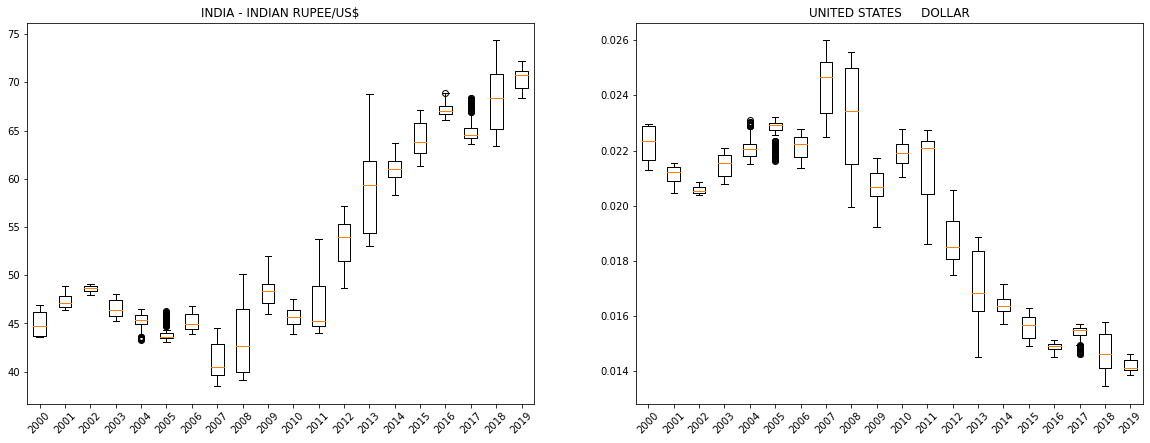

   Time Serie  KOREA - WON/US$  year
0  2000-01-03           1128.0  2000
1  2000-01-04           1122.5  2000
2  2000-01-05           1135.0  2000
3  2000-01-06           1146.5  2000
4  2000-01-07           1138.0  2000
      Time Serie  KOREA - WON/US$  year
5211  2019-12-24          1163.21  2019
5213  2019-12-26          1161.18  2019
5214  2019-12-27          1160.87  2019
5215  2019-12-30          1155.75  2019
5216  2019-12-31          1155.46  2019


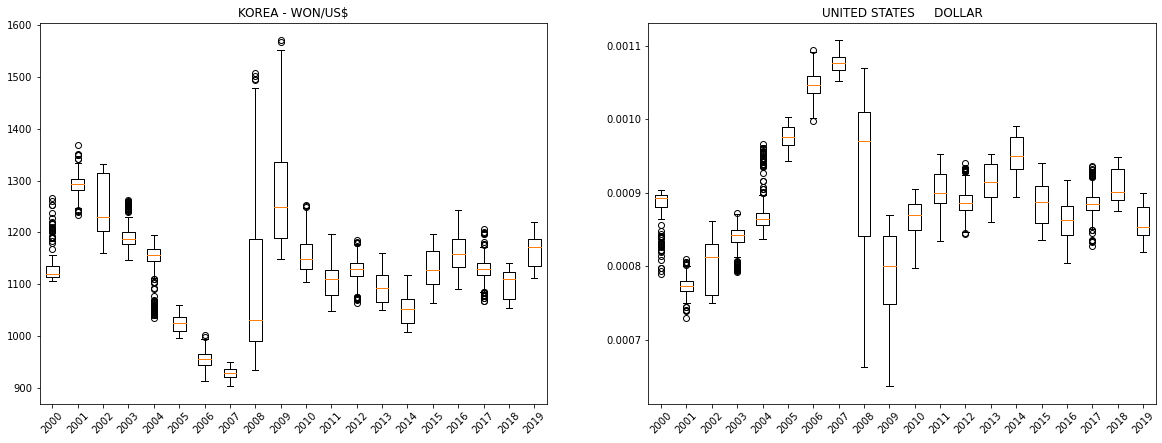

   Time Serie  MEXICO - MEXICAN PESO/US$  year
0  2000-01-03                     9.4015  2000
1  2000-01-04                     9.4570  2000
2  2000-01-05                     9.5350  2000
3  2000-01-06                     9.5670  2000
4  2000-01-07                     9.5200  2000
      Time Serie  MEXICO - MEXICAN PESO/US$  year
5211  2019-12-24                     18.955  2019
5213  2019-12-26                     18.944  2019
5214  2019-12-27                     18.819  2019
5215  2019-12-30                     18.863  2019
5216  2019-12-31                     18.860  2019


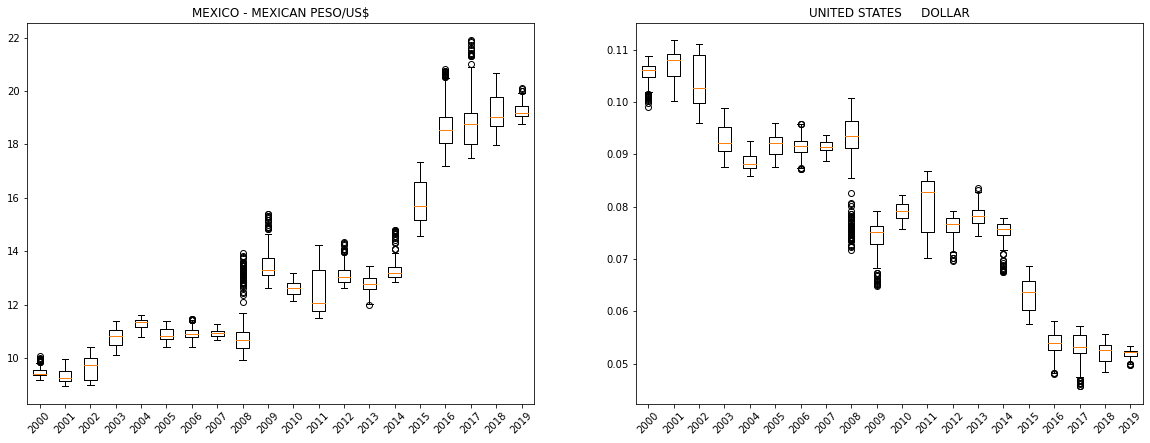

   Time Serie  SOUTH AFRICA - RAND/US$  year
0  2000-01-03                    6.126  2000
1  2000-01-04                    6.085  2000
2  2000-01-05                    6.070  2000
3  2000-01-06                    6.080  2000
4  2000-01-07                    6.057  2000
      Time Serie  SOUTH AFRICA - RAND/US$  year
5211  2019-12-24                   14.143  2019
5213  2019-12-26                   14.132  2019
5214  2019-12-27                   14.025  2019
5215  2019-12-30                   14.056  2019
5216  2019-12-31                   13.973  2019


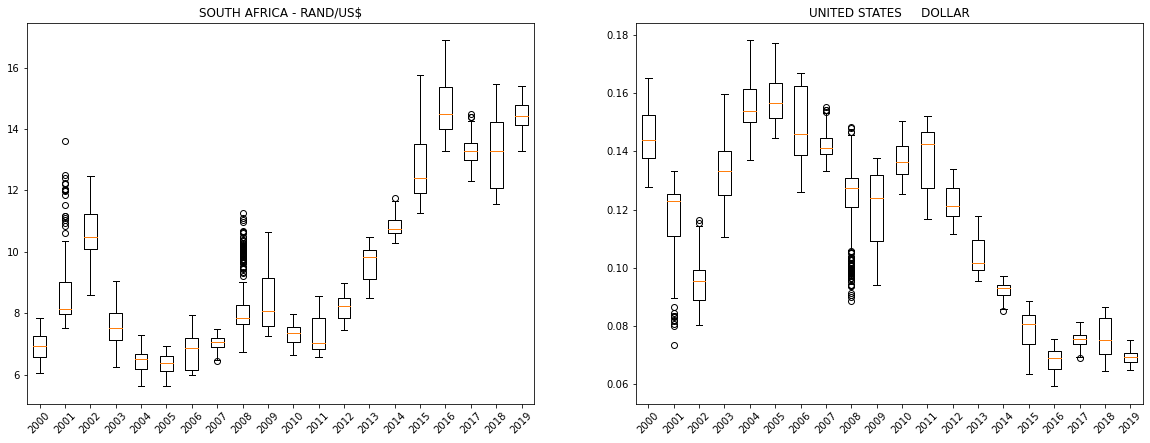

   Time Serie  SINGAPORE - SINGAPORE DOLLAR/US$  year
0  2000-01-03                            1.6563  2000
1  2000-01-04                            1.6535  2000
2  2000-01-05                            1.6560  2000
3  2000-01-06                            1.6655  2000
4  2000-01-07                            1.6625  2000
      Time Serie  SINGAPORE - SINGAPORE DOLLAR/US$  year
5211  2019-12-24                            1.3550  2019
5213  2019-12-26                            1.3540  2019
5214  2019-12-27                            1.3520  2019
5215  2019-12-30                            1.3483  2019
5216  2019-12-31                            1.3446  2019


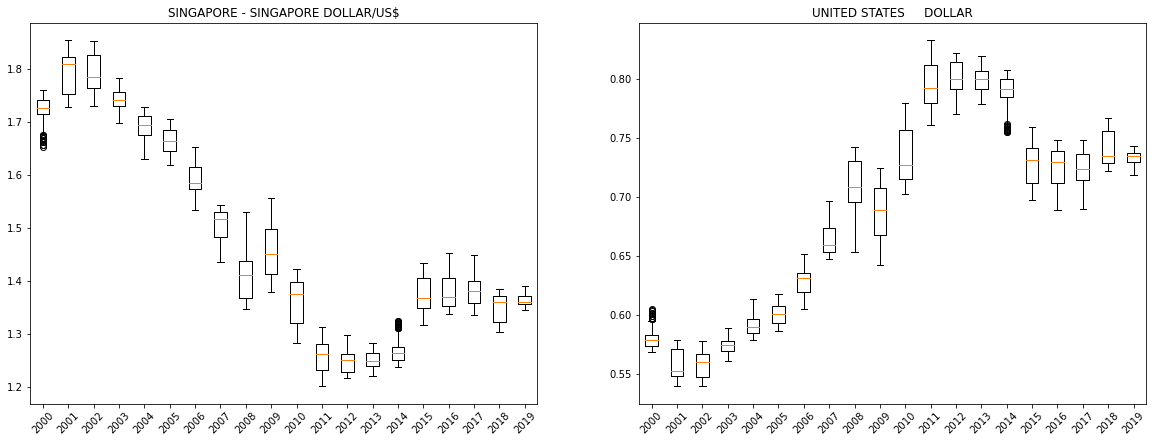

   Time Serie  DENMARK - DANISH KRONE/US$  year
0  2000-01-03                      7.3290  2000
1  2000-01-04                      7.2180  2000
2  2000-01-05                      7.2080  2000
3  2000-01-06                      7.2125  2000
4  2000-01-07                      7.2285  2000
      Time Serie  DENMARK - DANISH KRONE/US$  year
5211  2019-12-24                      6.7399  2019
5213  2019-12-26                      6.7295  2019
5214  2019-12-27                      6.6829  2019
5215  2019-12-30                      6.6589  2019
5216  2019-12-31                      6.6554  2019


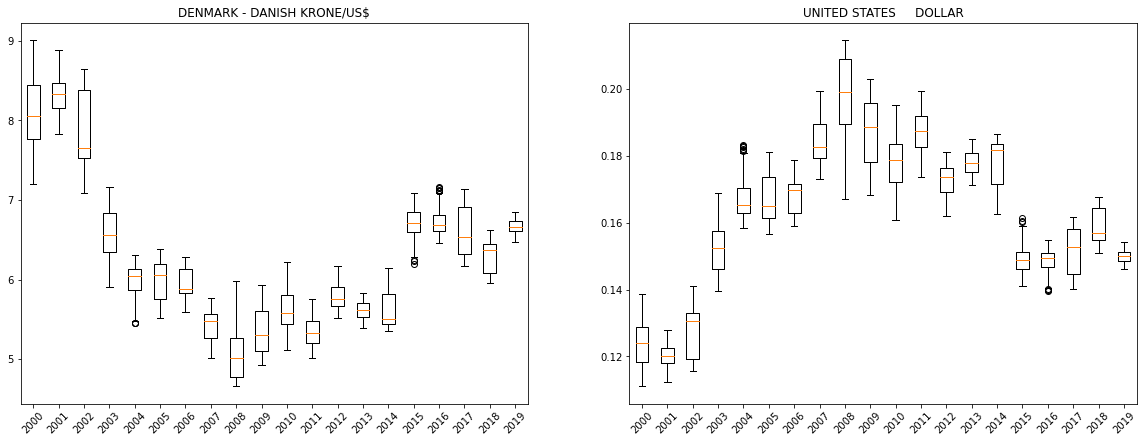

   Time Serie  JAPAN - YEN/US$  year
0  2000-01-03           101.70  2000
1  2000-01-04           103.09  2000
2  2000-01-05           103.77  2000
3  2000-01-06           105.19  2000
4  2000-01-07           105.17  2000
      Time Serie  JAPAN - YEN/US$  year
5211  2019-12-24           109.38  2019
5213  2019-12-26           109.67  2019
5214  2019-12-27           109.47  2019
5215  2019-12-30           108.85  2019
5216  2019-12-31           108.67  2019


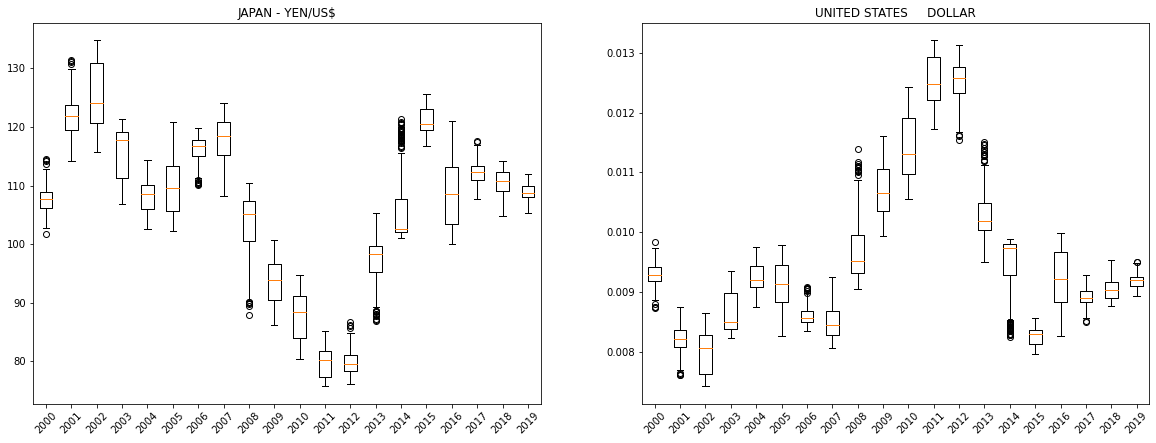

   Time Serie  MALAYSIA - RINGGIT/US$  year
0  2000-01-03                     3.8  2000
1  2000-01-04                     3.8  2000
2  2000-01-05                     3.8  2000
3  2000-01-06                     3.8  2000
4  2000-01-07                     3.8  2000
      Time Serie  MALAYSIA - RINGGIT/US$  year
5211  2019-12-24                  4.1350  2019
5213  2019-12-26                  4.1337  2019
5214  2019-12-27                  4.1260  2019
5215  2019-12-30                  4.1053  2019
5216  2019-12-31                  4.0918  2019


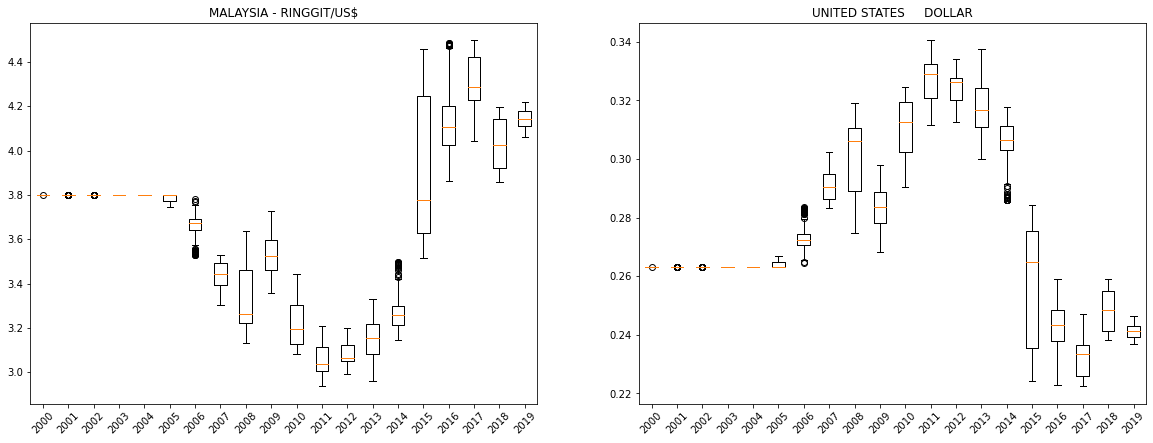

   Time Serie  NORWAY - NORWEGIAN KRONE/US$  year
0  2000-01-03                         7.964  2000
1  2000-01-04                         7.934  2000
2  2000-01-05                         7.935  2000
3  2000-01-06                         7.940  2000
4  2000-01-07                         7.966  2000
      Time Serie  NORWAY - NORWEGIAN KRONE/US$  year
5211  2019-12-24                        8.9142  2019
5213  2019-12-26                        8.8799  2019
5214  2019-12-27                        8.8291  2019
5215  2019-12-30                        8.7839  2019
5216  2019-12-31                        8.7823  2019


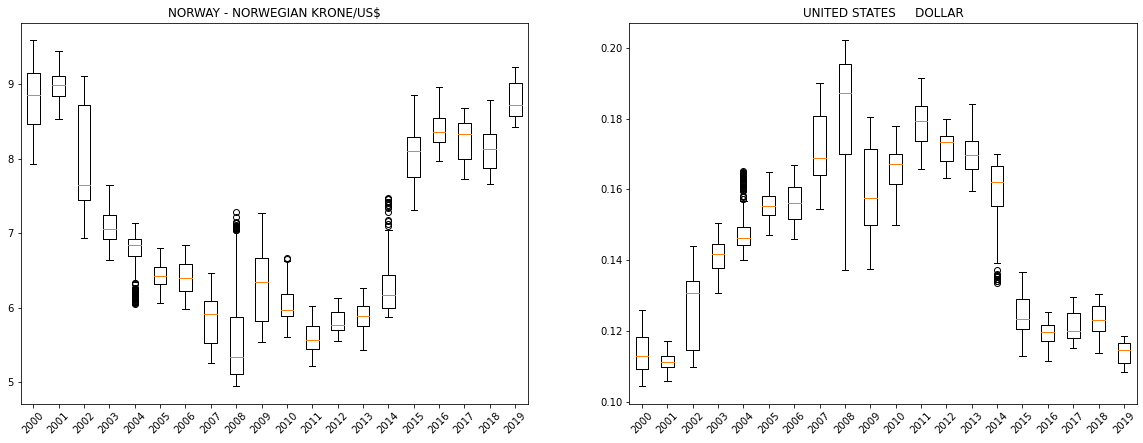

   Time Serie  SWEDEN - KRONA/US$  year
0  2000-01-03              8.4430  2000
1  2000-01-04              8.3600  2000
2  2000-01-05              8.3530  2000
3  2000-01-06              8.3675  2000
4  2000-01-07              8.4150  2000
      Time Serie  SWEDEN - KRONA/US$  year
5211  2019-12-24              9.4133  2019
5213  2019-12-26              9.4108  2019
5214  2019-12-27              9.3405  2019
5215  2019-12-30              9.3145  2019
5216  2019-12-31              9.3425  2019


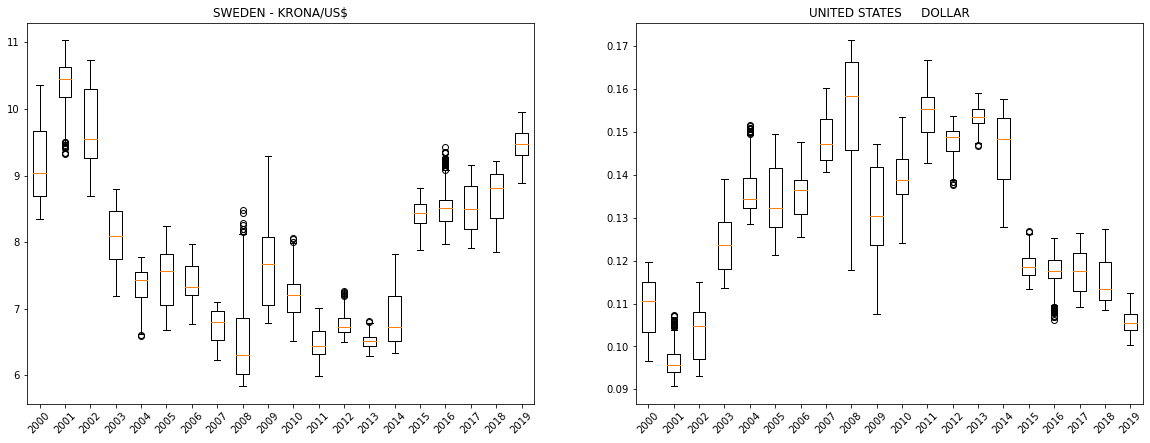

   Time Serie  SRI LANKA - SRI LANKAN RUPEE/US$  year
0  2000-01-03                             72.30  2000
1  2000-01-04                             72.65  2000
2  2000-01-05                             72.95  2000
3  2000-01-06                             72.95  2000
4  2000-01-07                             73.15  2000
      Time Serie  SRI LANKA - SRI LANKAN RUPEE/US$  year
5211  2019-12-24                            181.30  2019
5213  2019-12-26                            181.30  2019
5214  2019-12-27                            181.35  2019
5215  2019-12-30                            181.60  2019
5216  2019-12-31                            181.30  2019


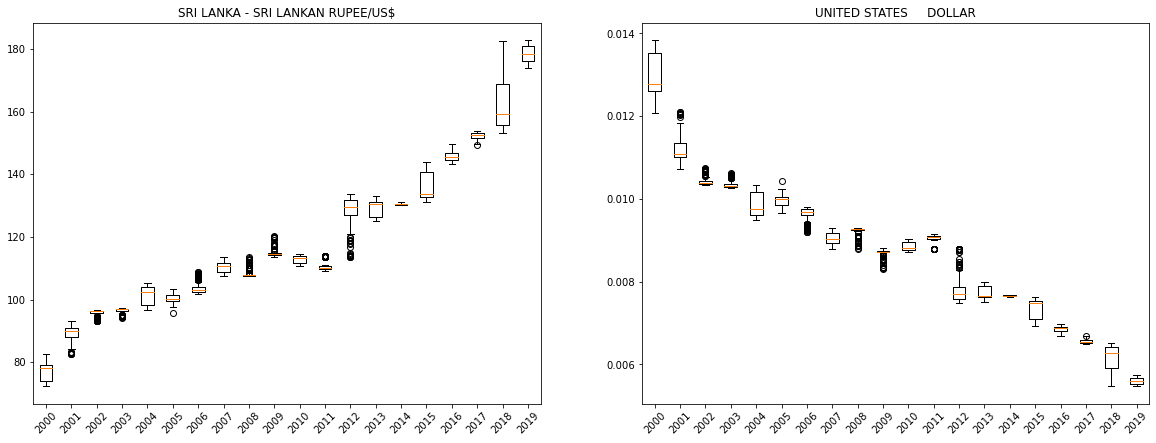

   Time Serie  SWITZERLAND - FRANC/US$  year
0  2000-01-03                   1.5808  2000
1  2000-01-04                   1.5565  2000
2  2000-01-05                   1.5526  2000
3  2000-01-06                   1.5540  2000
4  2000-01-07                   1.5623  2000
      Time Serie  SWITZERLAND - FRANC/US$  year
5211  2019-12-24                   0.9807  2019
5213  2019-12-26                   0.9808  2019
5214  2019-12-27                   0.9741  2019
5215  2019-12-30                   0.9677  2019
5216  2019-12-31                   0.9677  2019


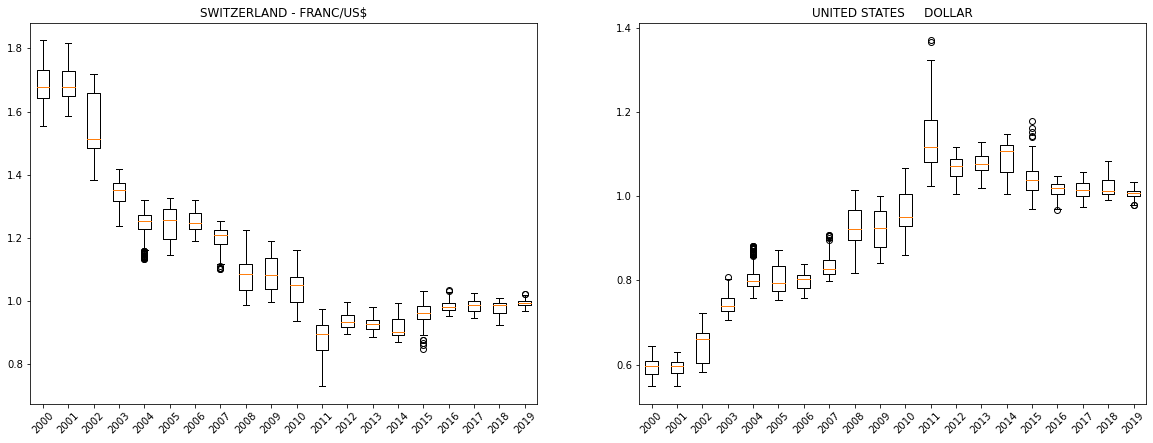

   Time Serie  TAIWAN - NEW TAIWAN DOLLAR/US$  year
0  2000-01-03                           31.38  2000
1  2000-01-04                           30.60  2000
2  2000-01-05                           30.80  2000
3  2000-01-06                           31.75  2000
4  2000-01-07                           30.85  2000
      Time Serie  TAIWAN - NEW TAIWAN DOLLAR/US$  year
5211  2019-12-24                           30.14  2019
5213  2019-12-26                           30.11  2019
5214  2019-12-27                           30.09  2019
5215  2019-12-30                           30.04  2019
5216  2019-12-31                           29.91  2019


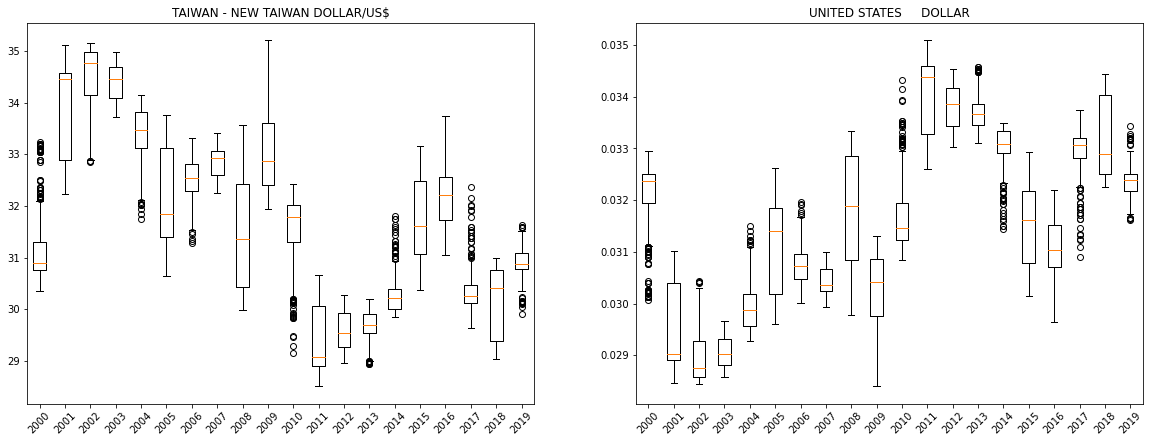

   Time Serie  THAILAND - BAHT/US$  year
0  2000-01-03                36.97  2000
1  2000-01-04                37.13  2000
2  2000-01-05                37.10  2000
3  2000-01-06                37.62  2000
4  2000-01-07                37.30  2000
      Time Serie  THAILAND - BAHT/US$  year
5211  2019-12-24                30.15  2019
5213  2019-12-26                30.15  2019
5214  2019-12-27                30.14  2019
5215  2019-12-30                29.94  2019
5216  2019-12-31                29.75  2019


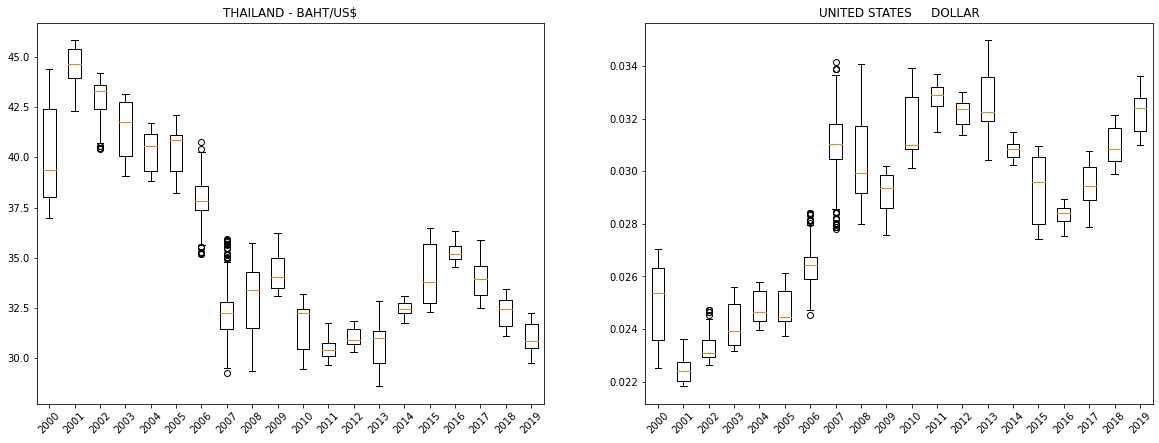

In [55]:
def boxplot_years(data, currency):
    cur_data = data[['Time Serie', currency]]
    cur_data = cur_data[cur_data[currency] != 'ND']
    cur_data[currency] = cur_data[currency].astype(float)
    cur_data['year'] = cur_data['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
    print(cur_data.head())
    print(cur_data.tail())

    fig = plt.figure(figsize=(20,7))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    years = cur_data['year'].unique().tolist()

    box = []
    for year in years:
        box.append(cur_data[cur_data['year'] == year][currency])
    ax1.boxplot(box)
    ax1.set_xticklabels(years, rotation=45)
    ax1.set_title(currency)


    box_us = []
    cur_data['US'] = 1/cur_data[currency]
    for year in years:
        box_us.append(cur_data[cur_data['year'] == year]['US'])
    ax2.boxplot(box_us)
    ax2.set_xticklabels(years, rotation=45)
    ax2.set_title('UNITED STATES     DOLLAR')

    plt.show()

for currency in currencies:
    if currency == 'Time Serie':
        pass
    boxplot_years(rates, currency)

   Time Serie  EURO AREA - EURO/US$  year
0  2000-01-03                0.9847  2000
1  2000-01-04                0.9700  2000
2  2000-01-05                0.9676  2000
3  2000-01-06                0.9686  2000
4  2000-01-07                0.9714  2000
      Time Serie  EURO AREA - EURO/US$  year
5211  2019-12-24                0.9022  2019
5213  2019-12-26                0.9007  2019
5214  2019-12-27                0.8949  2019
5215  2019-12-30                0.8915  2019
5216  2019-12-31                0.8907  2019


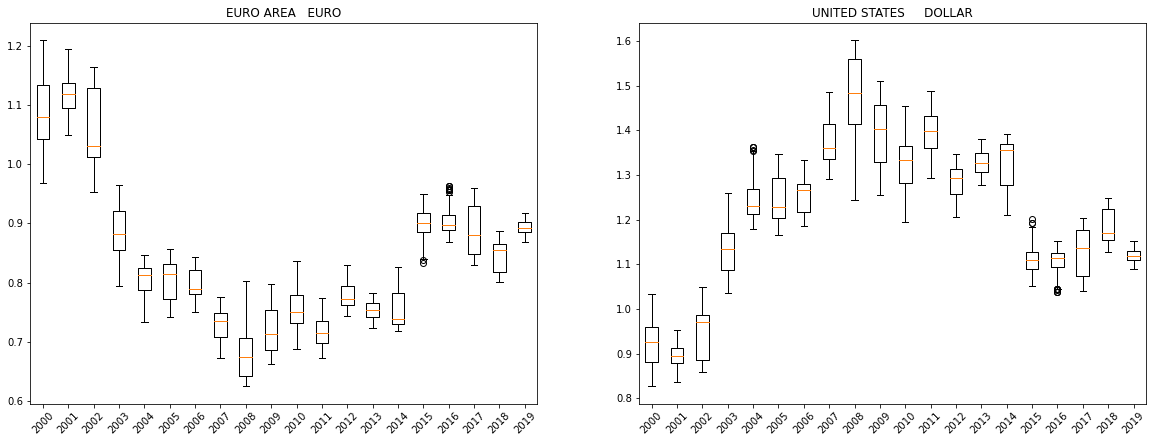

In [48]:
EA = 'EURO AREA - EURO/US$'
euro = rates[['Time Serie', EA]]
euro = euro[euro[EA] != 'ND']
euro[EA] = euro[EA].astype(float)
euro['year'] = euro['Time Serie'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
print(euro.head())
print(euro.tail())

fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

years = euro['year'].unique().tolist()

box_ea = []
for year in years:
    box_ea.append(euro[euro['year'] == year][EA])
ax1.boxplot(box_ea)
ax1.set_xticklabels(years, rotation=45)
ax1.set_title('EURO AREA   EURO')
    

box_us = []
euro['US'] = 1/euro[EA]
for year in years:
    box_us.append(euro[euro['year'] == year]['US'])
ax2.boxplot(box_us)
ax2.set_xticklabels(years, rotation=45)
ax2.set_title('UNITED STATES     DOLLAR')

plt.show()

   Time Serie  EURO AREA - EURO/US$  year
0  2000-01-03                0.9847  2000
1  2000-01-04                0.9700  2000
2  2000-01-05                0.9676  2000
3  2000-01-06                0.9686  2000
4  2000-01-07                0.9714  2000
      Time Serie  EURO AREA - EURO/US$  year
5211  2019-12-24                0.9022  2019
5213  2019-12-26                0.9007  2019
5214  2019-12-27                0.8949  2019
5215  2019-12-30                0.8915  2019
5216  2019-12-31                0.8907  2019


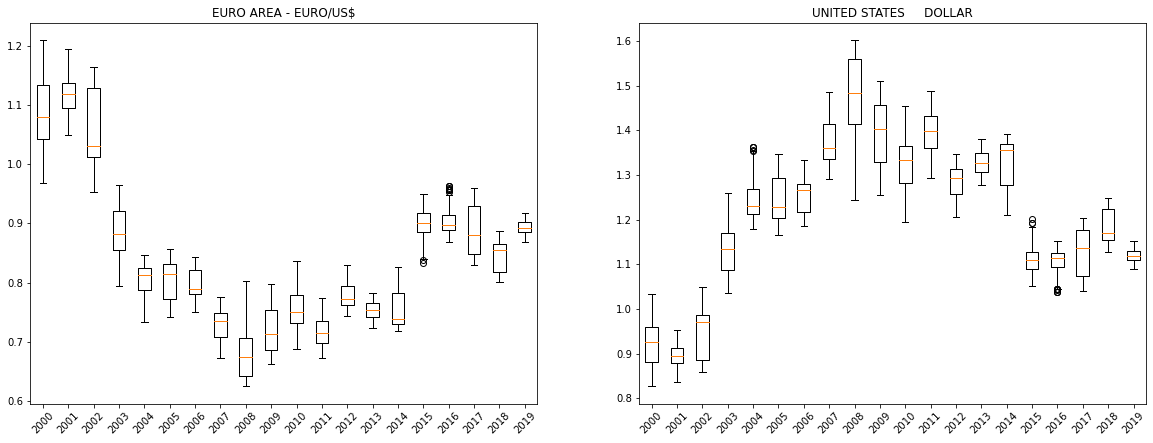

In [50]:

    
boxplot_years(rates, 'EURO AREA - EURO/US$')

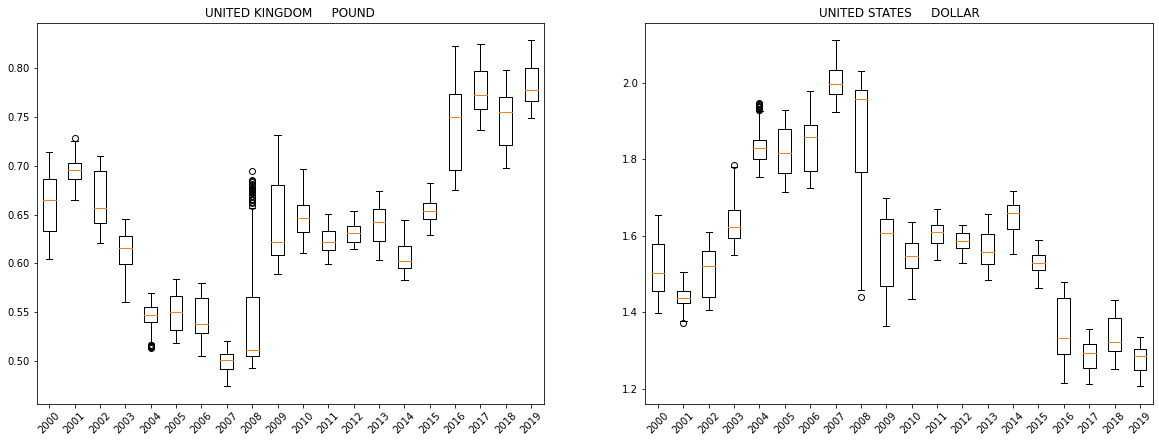

In [43]:
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

years = pound['year'].unique().tolist()

box_uk = []
for year in years:
    box_uk.append(pound[pound['year'] == year][UK])
ax1.boxplot(box_uk)
ax1.set_xticklabels(years, rotation=45)
ax1.set_title('UNITED KINGDOM     POUND')
    

box_us = []
pound['US'] = 1/pound[UK]
for year in years:
    box_us.append(pound[pound['year'] == year]['US'])
ax2.boxplot(box_us)
ax2.set_xticklabels(years, rotation=45)
ax2.set_title('UNITED STATES     DOLLAR')

plt.show()

In [27]:
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

years = pound['year'].unique().tolist()

box_uk = []
for year in years:
    box_uk.append(pound[pound['year'] == year][UK])
ax1.boxplot(box_uk)
ax1.set_xticklabels(years, rotation=45)
#ax1.set_title('UNITED STATES     DOLLAR')
    

box_us = []
pound['US'] = 1/pound[UK]
for year in years:
    box_us.append(pound[pound['year'] == year]['US'])
ax2.boxplot(box_us)
ax2.set_xticklabels(years, rotation=45)
#ax2.set_title('UNITED KINGDOM     POUND')    

plt.show()

1.4285714285714286